House Sales in King County, USA
homes sold between May 2014 and May 2015
The description for the 20 features is given below:

id :- It is the unique numeric number assigned to each house being sold.
date :- It is the date on which the house was sold out.
price:- It is the price of house which we have to predict so this is our target variable and aprat from it are our features.
bedrooms :- It determines number of bedrooms in a house.
bathrooms :- It determines number of bathrooms in a bedroom of a house.
sqft_living :- It is the measurement variable which determines the measurement of house in square foot.
sqft_lot : It is also the measurement variable which determines square foot of the lot.
floors: It determines total floors means levels of house.
waterfront : This feature determines whether a house has a view to waterfront 0 means no 1 means yes.
view : This feature determines whether a house has been viewed or not 0 means no 1 means yes.
condition : It determines the overall condition of a house on a scale of 1 to 5.
grade : It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11
sqft_above : It determines square footage of house apart from basement.
sqft_basement : It determines square footage of the basement of the house.
yr_built : It detrmines the date of building of the house.
yr_renovated : It detrmines year of renovation of house.
zipcode : It determines the zipcode of the location of the house.
lat : It determines the latitude of the location of the house.
long : It determines the longitude of the location of the house.
sqft_living15 : Living room area in 2015(implies-- some renovations)
sqft_lot15 : lotSize area in 2015(implies-- some renovations)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler, QuantileTransformer
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from xgboost import XGBRegressor


In [2]:
df = pd.read_csv(r"C:\Users\Gebruiker\Desktop\IronHack\IronHack kaggle\archive\king_ country_ houses_aa.csv")

In [3]:
df.head(15)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [4]:
df['waterfront'].max()

np.int64(1)

In [5]:
df.info()
df.keys()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
df.duplicated().max()

np.False_

In [8]:
duplicates=df[df.duplicated()]
#shows duplicated rows

In [9]:
duplicates.shape[0]

0

In [10]:
df[df.duplicated()]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [11]:
df=df.drop_duplicates().reset_index(drop=True)

In [12]:
df[df.duplicated()]
#shows duplicated rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [13]:
df.isnull().sum()
#shows empty columns

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [14]:
#dropped columns that are not needed
df = df.drop(['id'], axis=1)

In [15]:
#converting date to datetime:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')
df['year_sold'] = df['date'].dt.year
df['month_sold'] = df['date'].dt.month
df.drop('date', axis=1, inplace=True)

In [16]:
#encoding zipcode
le = LabelEncoder()
df['zipcode'] = le.fit_transform(df['zipcode'])

In [17]:
df.head(15)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,66,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,55,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,16,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,58,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,37,47.6168,-122.045,1800,7503,2015,2
5,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,...,1530,2001,0,29,47.6561,-122.005,4760,101930,2014,5
6,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,...,0,1995,0,2,47.3097,-122.327,2238,6819,2014,6
7,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,...,0,1963,0,68,47.4095,-122.315,1650,9711,2015,1
8,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,...,730,1960,0,60,47.5123,-122.337,1780,8113,2015,4
9,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,...,0,2003,0,23,47.3684,-122.031,2390,7570,2015,3


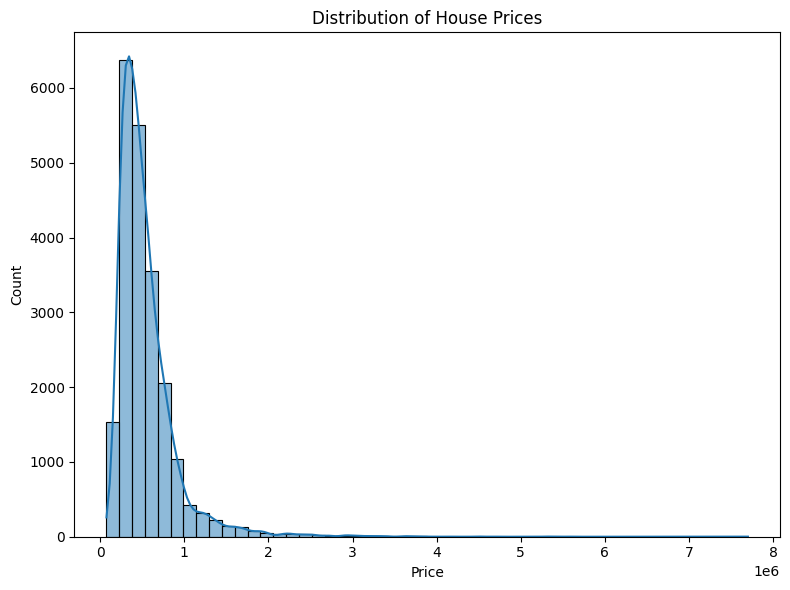

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


In [ ]:
#X-Axis houses priced between €100k–€200k, €200k–€300k
#Y - houses that fall into that price
#shape - skewed - right, most houses are lower-priced
#the KDE line curve shows where are the prices the most concentrated
#there are some outliers - really expensive houses but not that many

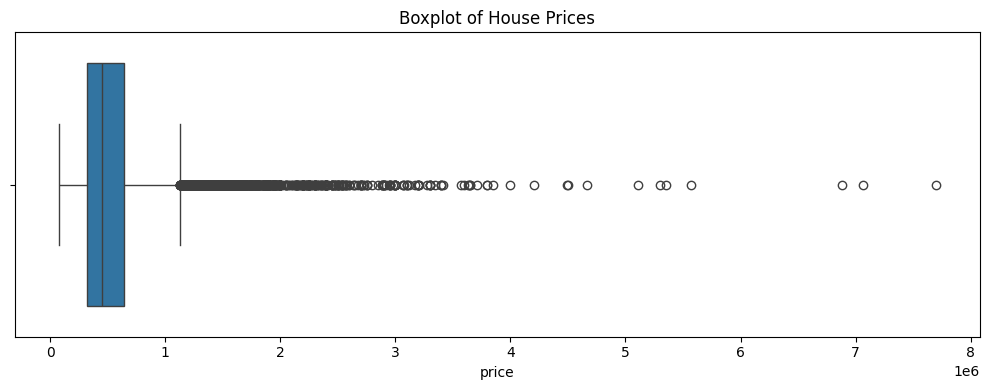

In [19]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['price'])
plt.title("Boxplot of House Prices")
plt.tight_layout()
plt.show()

In [ ]:
#in this boxplot outliers are much better visible - high house prices
#the median is almost centered, we can also say the whiskers are similar lengths

In [86]:
correlation = df['yr_built'].corr(df['price'])
print(f"Correlation between yr_built and price: {correlation:.4f}")

Correlation between yr_built and price: 0.0540


In [62]:
#is's close to 0 so no linear correlation

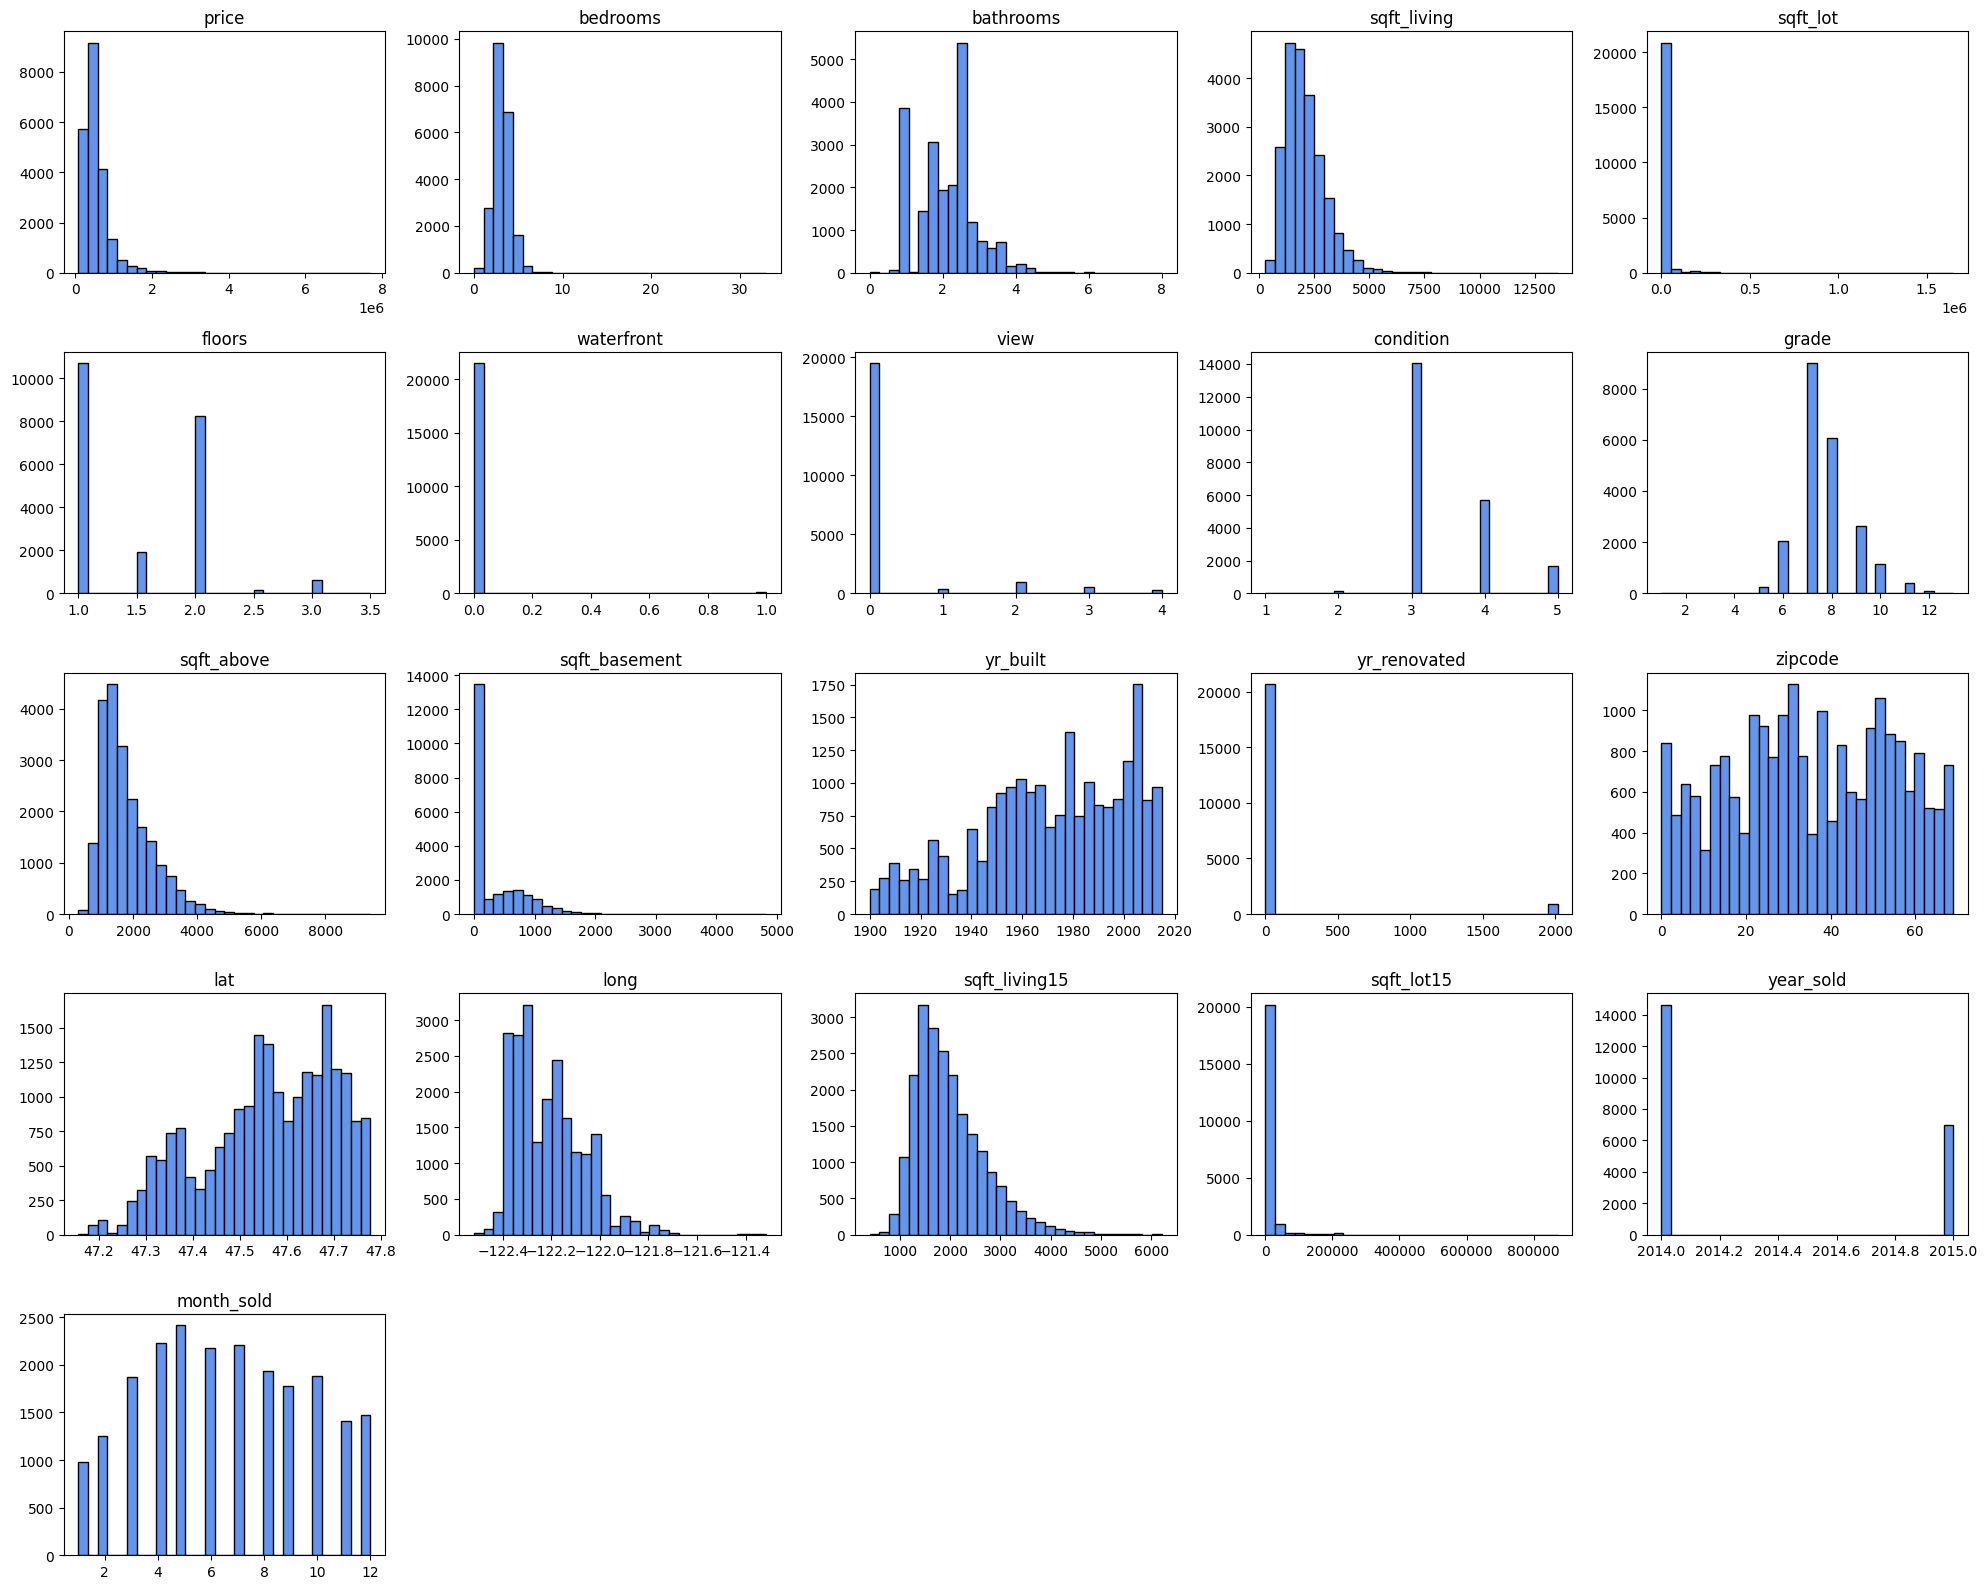

In [20]:
num = df.select_dtypes(include='number')

# Plot settings
color = '#6495ED'
# Grid size
nrows, ncols = 5, 5  # Adjust based on how many variables you want to show
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))
axes = axes.flatten()
# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # Hide unused plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])
plt.tight_layout()
plt.show()


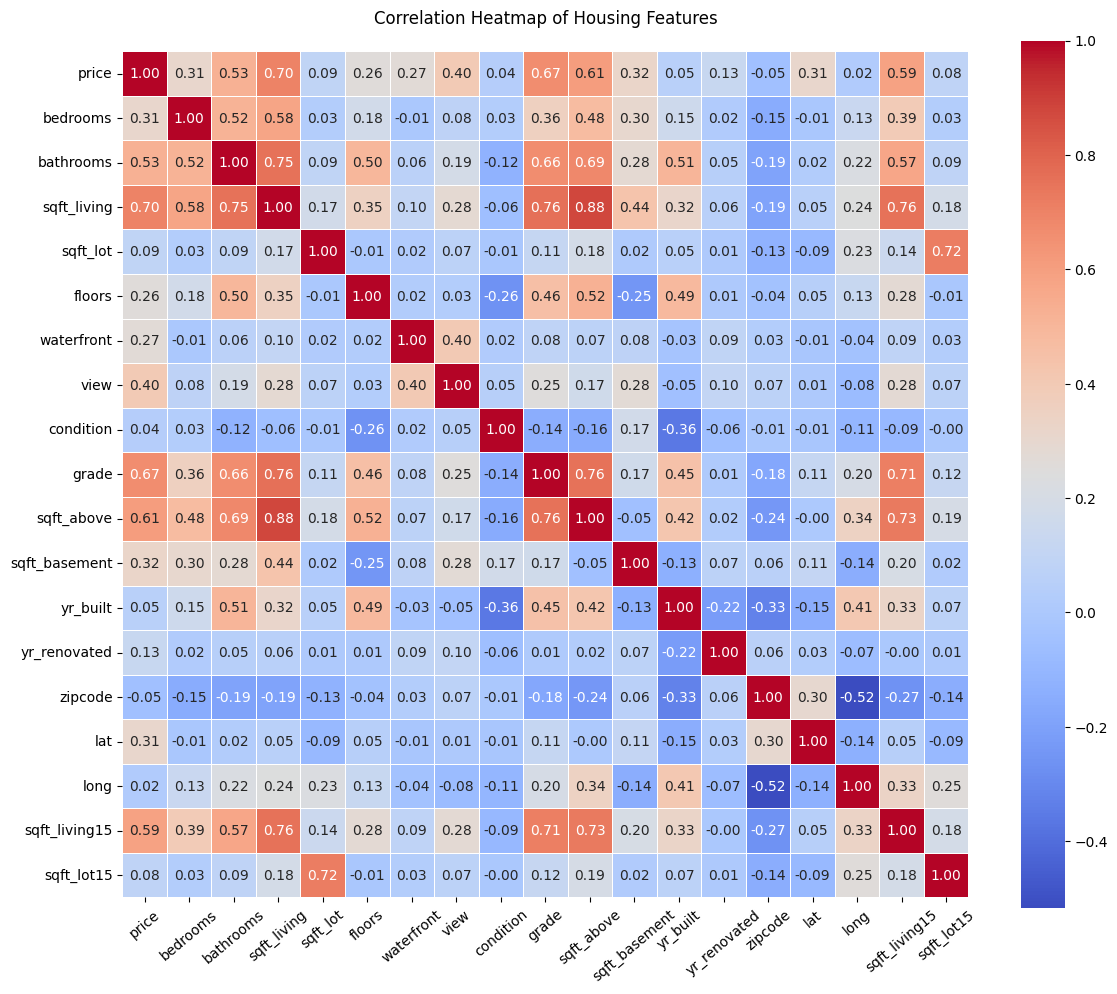

In [21]:
# Drop the 'id' column (not needed)
if 'id' in df.columns:
    df = df.drop(columns=['id'])

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Create the heatmap
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=0.5)
# Rotate x-axis labels
plt.xticks(rotation=40)

plt.title("Correlation Heatmap of Housing Features", pad = 20)
plt.tight_layout()
plt.show()

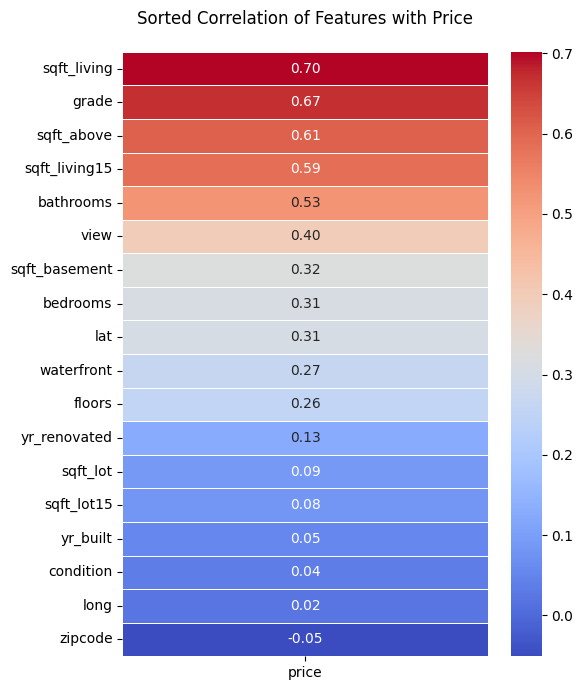

In [56]:
if 'id' in df.columns:
    df = df.drop(columns=['id'])
if 'date' in df.columns:
    df = df.drop(columns=['date'])

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Compute the correlation matrix
corr = numeric_df.corr()

# Extract correlations with 'price' and sort them
price_corr = corr[['price']].drop('price')  # Exclude self-correlation
price_corr_sorted = price_corr.sort_values(by='price', ascending=False)

# Plot the sorted heatmap
plt.figure(figsize=(6, 7))
sns.heatmap(price_corr_sorted, annot=True, cmap='coolwarm', cbar=True, fmt=".2f", linewidths=0.5)
plt.title("Sorted Correlation of Features with Price", pad=20)
plt.tight_layout()
plt.show()

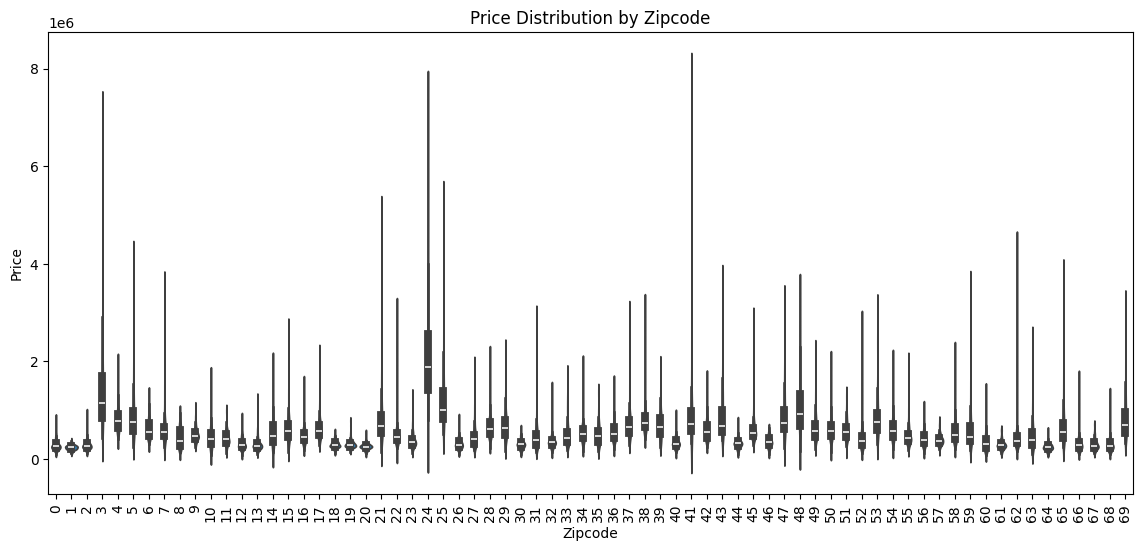

In [23]:
plt.figure(figsize=(14,6))
sns.violinplot(x='zipcode', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution by Zipcode')
plt.xlabel('Zipcode')
plt.ylabel('Price')
plt.show()

In [ ]:
#the widith at different price levels show the density(how many houses fall into that price range)
#a narrower section means fewer houses at that price range
#white line median price for that zipcode - different median price (center line) different ranges between zipcodes
#higher median price line have generally more expensive homes
#multiple peaks may suggest different market segments within the same zipcode
#the height of the violin shows the range of prices (from min to max)

In [24]:
X = df.drop('price', axis=1)
y = df['price']

In [25]:
# Split in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check train and test sizes
print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(21613, 20) (17290, 20) (4323, 20)
(21613,) (17290,) (4323,)


In [26]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

In [27]:
X = df.drop('price', axis=1)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,47.6168,-122.045,1800,7503,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,42,47.6993,-122.346,1530,1509,2014,5
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,60,47.5107,-122.362,1830,7200,2015,2
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,59,47.5944,-122.299,1020,2007,2014,6
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,15,47.5345,-122.069,1410,1287,2015,1


In [29]:
def evaluate_models(train_X, test_X, train_y, test_y):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'KNN': KNeighborsRegressor(),
        'XGBoost': XGBRegressor(random_state=42, verbosity=0)
    }

    results = []

    for name, model in models.items():
        model.fit(train_X, train_y)

        # Predictions
        train_preds = model.predict(train_X)
        test_preds = model.predict(test_X)

        # Train metrics
        r2_train = r2_score(train_y, train_preds)
        mae_train = mean_absolute_error(train_y, train_preds)
        rmse_train = np.sqrt(mean_squared_error(train_y, train_preds))

        # Test metrics
        r2_test = r2_score(test_y, test_preds)
        mae_test = mean_absolute_error(test_y, test_preds)
        rmse_test = np.sqrt(mean_squared_error(test_y, test_preds))

        results.append({
            'Model': name,
            'R2 Train': round(r2_train, 4),
            'MAE Train': round(mae_train, 4),
            'RMSE Train': round(rmse_train, 4),
            'R2 Test': round(r2_test, 4),
            'MAE Test': round(mae_test, 4),
            'RMSE Test': round(rmse_test, 4)
        })

    results_df = pd.DataFrame(results)
    return results_df


#takes training and testing data, fits LR, DT, RF, KNN, XGB on the training data and evalualtes their performance on the test data, and returns a summary of their scores
#R2 Score: How well the model fits the data (higher is better, max 1)
#MAE (Mean Absolute Error): Average absolute difference between predicted and true values (lower is better)
#RMSE (Root Mean Squared Error): Square root of average squared differences (lower is better)

In [30]:
evaluate_models(X_train, X_test, y_train, y_test)

,Model,R2 Train,MAE Train,RMSE Train,R2 Test,MAE Test,RMSE Test
0,Linear Regression,0.7013,124566.5251,197539.5918,0.7034,126807.8815,211755.1798
1,Decision Tree,1.0000,0.0000,0.0000,0.7048,104482.8223,211246.3140
2,Random Forest,0.9835,25340.5261,46441.5539,0.8507,72895.6975,150222.4806
3,KNN,0.6758,126567.8734,205809.9577,0.5038,164991.8859,273877.9857
4,XGBoost,0.9774,38719.6207,54387.6444,0.8658,69609.6814,142414.6545


In [ ]:
#R2 score for XGBoost and Random Forest is closest to 1. They explain the most variance in the target.
#MAE (Mean Absolute Error) and RMSE (Root Mean Squared Error) (lower is better):
# XGBoost and Random Forest have the lowest errors, so their predictions are closest to the true values

In [31]:
#how different feature scaling methods affect the performance of 2 models: Random Forest and XGBoost
# It scales selected continuous features, trains the models, evaluates them, and reports the results

def evaluate_scalers_models(X, y): 
    continuous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15']

    scalers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler(),
        'MaxAbsScaler': MaxAbsScaler(),
        'QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=42)
    }

    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0)
    }

    results = []

    for scaler_name, scaler in scalers.items():
        X_scaled = X.copy()
        X_scaled[continuous_features] = scaler.fit_transform(X_scaled[continuous_features])

        train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        for model_name, model in models.items():
            model.fit(train_X, train_y)

            # Predictions
            train_preds = model.predict(train_X)
            test_preds = model.predict(test_X)

            # Train metrics
            r2_train = r2_score(train_y, train_preds)
            mae_train = mean_absolute_error(train_y, train_preds)
            rmse_train = np.sqrt(mean_squared_error(train_y, train_preds))

            # Test metrics
            r2_test = r2_score(test_y, test_preds)
            mae_test = mean_absolute_error(test_y, test_preds)
            rmse_test = np.sqrt(mean_squared_error(test_y, test_preds))

            results.append({
                'Scaler': scaler_name,
                'Model': model_name,
                'R2 Train': round(r2_train, 4),
                'MAE Train': round(mae_train, 4),
                'RMSE Train': round(rmse_train, 4),
                'R2 Test': round(r2_test, 4),
                'MAE Test': round(mae_test, 4),
                'RMSE Test': round(rmse_test, 4)
            })

    results_df = pd.DataFrame(results)
    print(results_df.to_string(index=False))


In [ ]:
#continuous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15'] these are the features I decided to keep
#QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=42)
#XGBoost


In [100]:
evaluate_models(X_train, X_test, y_train, y_test)

,Model,R2 Train,MAE Train,RMSE Train,R2 Test,MAE Test,RMSE Test
0,Linear Regression,0.7013,124566.5251,197539.5918,0.7034,126807.8815,211755.1798
1,Decision Tree,1.0000,0.0000,0.0000,0.7048,104482.8223,211246.3140
2,Random Forest,0.9835,25340.5261,46441.5539,0.8507,72895.6975,150222.4806
3,KNN,0.6758,126567.8734,205809.9577,0.5038,164991.8859,273877.9857
4,XGBoost,0.9774,38719.6207,54387.6444,0.8658,69609.6814,142414.6545


In [101]:
evaluate_scalers_models(X, y)
evaluate_scalers_models

             Scaler         Model  R2 Train  MAE Train  RMSE Train  R2 Test   MAE Test   RMSE Test
     StandardScaler Random Forest    0.9835 25347.6259  46448.6285   0.8508 72885.4348 150192.7324
     StandardScaler       XGBoost    0.9572 50722.4556  74804.1208   0.8803 69257.9083 134544.8991
       MinMaxScaler Random Forest    0.9835 25343.1833  46440.1085   0.8507 72881.0188 150213.9967
       MinMaxScaler       XGBoost    0.9572 50722.4556  74804.1208   0.8803 69257.9083 134544.8991
       RobustScaler Random Forest    0.9835 25338.8235  46428.0294   0.8507 72894.2670 150228.4161
       RobustScaler       XGBoost    0.9572 50722.4556  74804.1208   0.8803 69257.9083 134544.8991
       MaxAbsScaler Random Forest    0.9835 25336.8611  46419.1955   0.8506 72928.1637 150279.4238
       MaxAbsScaler       XGBoost    0.9572 50722.4556  74804.1208   0.8803 69257.9083 134544.8991
QuantileTransformer Random Forest    0.9835 25335.8467  46453.2465   0.8503 72993.8638 150445.7362
QuantileTr

<function __main__.evaluate_scalers_models(X, y)>

In [ ]:
#continuous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15'] these are the features I decided to keep
#QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=42)
#XGBoost

In [ ]:
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
6325,3,1.75,1780,13095,1.0,0,0,4,9,1780,0,1983,0,26,47.3670,-122.152,2750,13095,2014,5
13473,2,1.00,1000,3700,1.0,0,0,3,6,800,200,1929,0,52,47.5520,-122.290,1270,5000,2015,3
17614,3,1.00,1080,7486,1.5,0,0,3,6,990,90,1942,0,60,47.4838,-122.335,1170,7800,2015,2
16970,3,2.25,2090,7500,1.0,0,0,4,7,1280,810,1977,0,19,47.3951,-122.172,1800,7350,2015,1
20868,2,2.50,1741,1439,2.0,0,0,3,8,1446,295,2007,0,22,47.7043,-122.209,2090,10454,2015,4


In [ ]:
#The features from the heatmap
selected_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15', 'bathrooms', 'view']
continuous_features = ['sqft_living', 'sqft_above', 'sqft_living15']

X_1 = df[selected_features]
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
X_1[continuous_features] = quantile_transformer.fit_transform(X_1[continuous_features])

y_1 = df['price']

C:\Users\Gebruiker\AppData\Local\Temp\ipykernel_25548\452034843.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_1[continuous_features] = quantile_transformer.fit_transform(X_1[continuous_features])


In [34]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1, y_1, test_size=0.2, random_state=42)

In [35]:
model = XGBRegressor(random_state=42, verbosity=0)
model.fit(X_train_1, y_train_1)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predictions
train_preds = model.predict(X_train_1)
test_preds = model.predict(X_test_1)

In [ ]:
# Train metrics
r2_train = r2_score(y_train_1, train_preds)
mae_train = mean_absolute_error(y_train_1, train_preds)
rmse_train = np.sqrt(mean_squared_error(y_train_1, train_preds))

# Test metrics
r2_test = r2_score(y_test_1, test_preds)
mae_test = mean_absolute_error(y_test_1, test_preds)
rmse_test = np.sqrt(mean_squared_error(y_test_1, test_preds))

In [38]:
results = []

In [ ]:
results.append({
            'Model': 'XGBoost',
            'R2 Train': round(r2_train, 4),
            'MAE Train': round(mae_train, 4),
            'RMSE Train': round(rmse_train, 4),
            'R2 Test': round(r2_test, 4),
            'MAE Test': round(mae_test, 4),
            'RMSE Test': round(rmse_test, 4)})

results_df = pd.DataFrame(results)

In [40]:
results_df

,Model,R2 Train,MAE Train,RMSE Train,R2 Test,MAE Test,RMSE Test
0,XGBoost,0.8484,106431.7068,140743.0711,0.524,153401.256,268245.052


In [ ]:
#Selecting only the features that were highly correlated with the target made the model worst. Thus, I didn't keep it. I'm going to continue experimenting with what I had before:
#all the features 
#continuous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15'] these are the features I decided to keep
#QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=42)
#XGBoost
#I tried to improve the model with scaling but it helped a bit only with XGBoost

In [ ]:
continuous_features = ['sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'lat', 'long', 'sqft_living15']
quantile_transformer = QuantileTransformer(output_distribution='normal', random_state=42)
X[continuous_features] = quantile_transformer.fit_transform(X[continuous_features])

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
X.shape

(21613, 20)

In [51]:
y.shape

(21613,)

In [ ]:
results = []

for max_depth in [1, 2, 4, 6, 8, 10]:
    model = XGBRegressor(
        max_depth=max_depth,
        random_state=42,
        verbosity=0
    )
    
    model.fit(train_X, train_y)

    # Predictions
    train_preds = model.predict(train_X)
    test_preds = model.predict(test_X)

    # Train metrics
    r2_train = r2_score(train_y, train_preds)
    mae_train = mean_absolute_error(train_y, train_preds)
    rmse_train = np.sqrt(mean_squared_error(train_y, train_preds))

    # Test metrics
    r2_test = r2_score(test_y, test_preds)
    mae_test = mean_absolute_error(test_y, test_preds)
    rmse_test = np.sqrt(mean_squared_error(test_y, test_preds))

    results.append({
        'Model': 'XGBoost',
        'Max Depth': max_depth,
        'R2 Train': round(r2_train, 4),
        'MAE Train': round(mae_train, 4),
        'RMSE Train': round(rmse_train, 4),
        'R2 Test': round(r2_test, 4),
        'MAE Test': round(mae_test, 4),
        'RMSE Test': round(rmse_test, 4)
    })

results_df = pd.DataFrame(results)

In [ ]:
results_df

,Model,Max Depth,R2 Train,MAE Train,RMSE Train,R2 Test,MAE Test,RMSE Test
0,XGBoost,1,0.7998,96024.1616,161738.1544,0.7309,104118.2581,201715.3048
1,XGBoost,2,0.8932,74565.2742,118096.4766,0.8093,85152.4917,169798.5660
2,XGBoost,4,0.9484,55080.5514,82113.9086,0.8370,73343.0944,156985.4173
3,XGBoost,6,0.9774,38627.9935,54294.1478,0.8706,69256.8090,139880.6699
4,XGBoost,8,0.9926,22212.1003,31182.4475,0.8676,69655.8024,141459.5124
5,XGBoost,10,0.9988,8354.7403,12479.0243,0.8377,72576.1759,156662.3606


In [ ]:
model = XGBRegressor(
    max_depth=6,
    n_estimators=500,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42)


In [62]:
model.fit(train_X, train_y)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Predictions
train_preds = model.predict(train_X)
test_preds = model.predict(test_X)

# Train metrics
r2_train = r2_score(train_y, train_preds)
mae_train = mean_absolute_error(train_y, train_preds)
rmse_train = np.sqrt(mean_squared_error(train_y, train_preds))

# Test metrics
r2_test = r2_score(test_y, test_preds)
mae_test = mean_absolute_error(test_y, test_preds)
rmse_test = np.sqrt(mean_squared_error(test_y, test_preds))

results.append({
    'Model': 'XGBoost',
    'Max Depth': max_depth,
    'R2 Train': round(r2_train, 4),
    'MAE Train': round(mae_train, 4),
    'RMSE Train': round(rmse_train, 4),
    'R2 Test': round(r2_test, 4),
    'MAE Test': round(mae_test, 4),
    'RMSE Test': round(rmse_test, 4)
})

results_df = pd.DataFrame(results)
results_df 


,Model,Max Depth,R2 Train,MAE Train,RMSE Train,R2 Test,MAE Test,RMSE Test
0,XGBoost,1,0.7998,96024.1616,161738.1544,0.7309,104118.2581,201715.3048
1,XGBoost,2,0.8932,74565.2742,118096.4766,0.8093,85152.4917,169798.5660
2,XGBoost,4,0.9484,55080.5514,82113.9086,0.8370,73343.0944,156985.4173
3,XGBoost,6,0.9774,38627.9935,54294.1478,0.8706,69256.8090,139880.6699
4,XGBoost,8,0.9926,22212.1003,31182.4475,0.8676,69655.8024,141459.5124
5,XGBoost,10,0.9988,8354.7403,12479.0243,0.8377,72576.1759,156662.3606
6,XGBoost,10,0.9762,39528.9834,55819.2451,0.8722,65794.4124,139009.5082
7,XGBoost,10,0.9762,39528.9834,55819.2451,0.8722,65794.4124,139009.5082
8,XGBoost,10,0.9762,39528.9834,55819.2451,0.8722,65794.4124,139009.5082


#best parameters
'''{  'colsample_bytree': 0.7,
  'learning_rate': 0.1,
  'max_depth': 4,
  'n_estimators': 500,
  'subsample': 0.7}''

#add 1by1 parameter
"'grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1)""

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define parameter grid
param_grid = {
    'max_depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 1],
    'colsample_bytree': [0.7, 1]}

# Create model
xgb_model = XGBRegressor(random_state=42, verbosity=0)

# Grid search
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    verbose=1,
    n_jobs=-1)

# Fit
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)
print("Best CV R2 Score:", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 500, 'subsample': 0.7}
Best CV R2 Score: 0.9040034340537584


In [ ]:
# the model on the test set using the best model from the search
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

best_model = grid_search.best_estimator_

# Predictions
y_pred = best_model.predict(X_test)

# Metrics
print("Test R²:", r2_score(y_test, y_pred))
print("Test MAE:", mean_absolute_error(y_test, y_pred))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


Test R²: 0.8855061739933061
Test MAE: 67955.39348036665
Test RMSE: 131562.91342700104


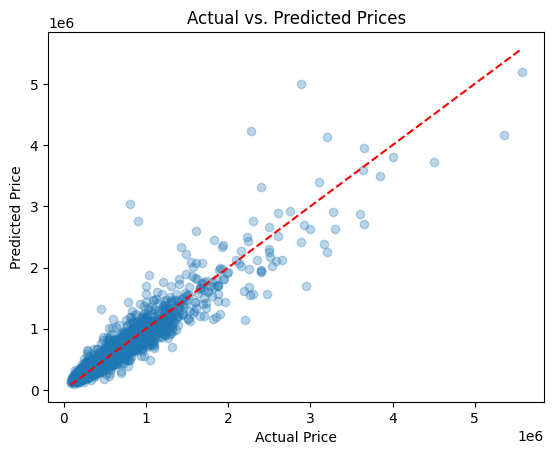

In [68]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs. Predicted Prices")
plt.show()


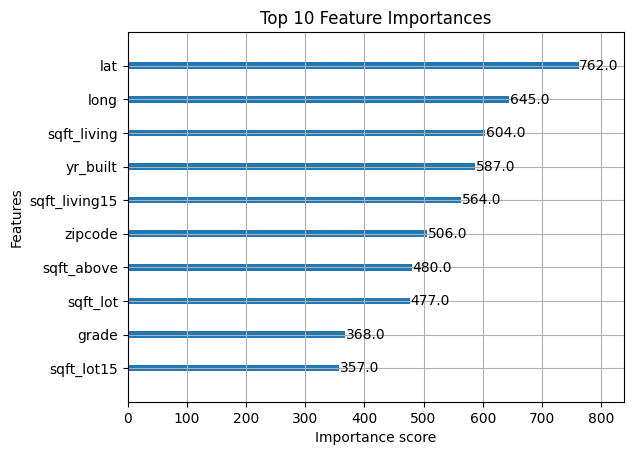

In [69]:
from xgboost import plot_importance
plot_importance(best_model, max_num_features=10)
plt.title("Top 10 Feature Importances")
plt.show()

In [42]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year_sold,month_sold
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,66,47.5112,-122.257,1340,5650,2014,10
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,55,47.7210,-122.319,1690,7639,2014,12
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,16,47.7379,-122.233,2720,8062,2015,2
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,58,47.5208,-122.393,1360,5000,2014,12
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,37,47.6168,-122.045,1800,7503,2015,2


####
"How would I make a model based on A'dam critria"
####

In [ ]:
#Don't use it

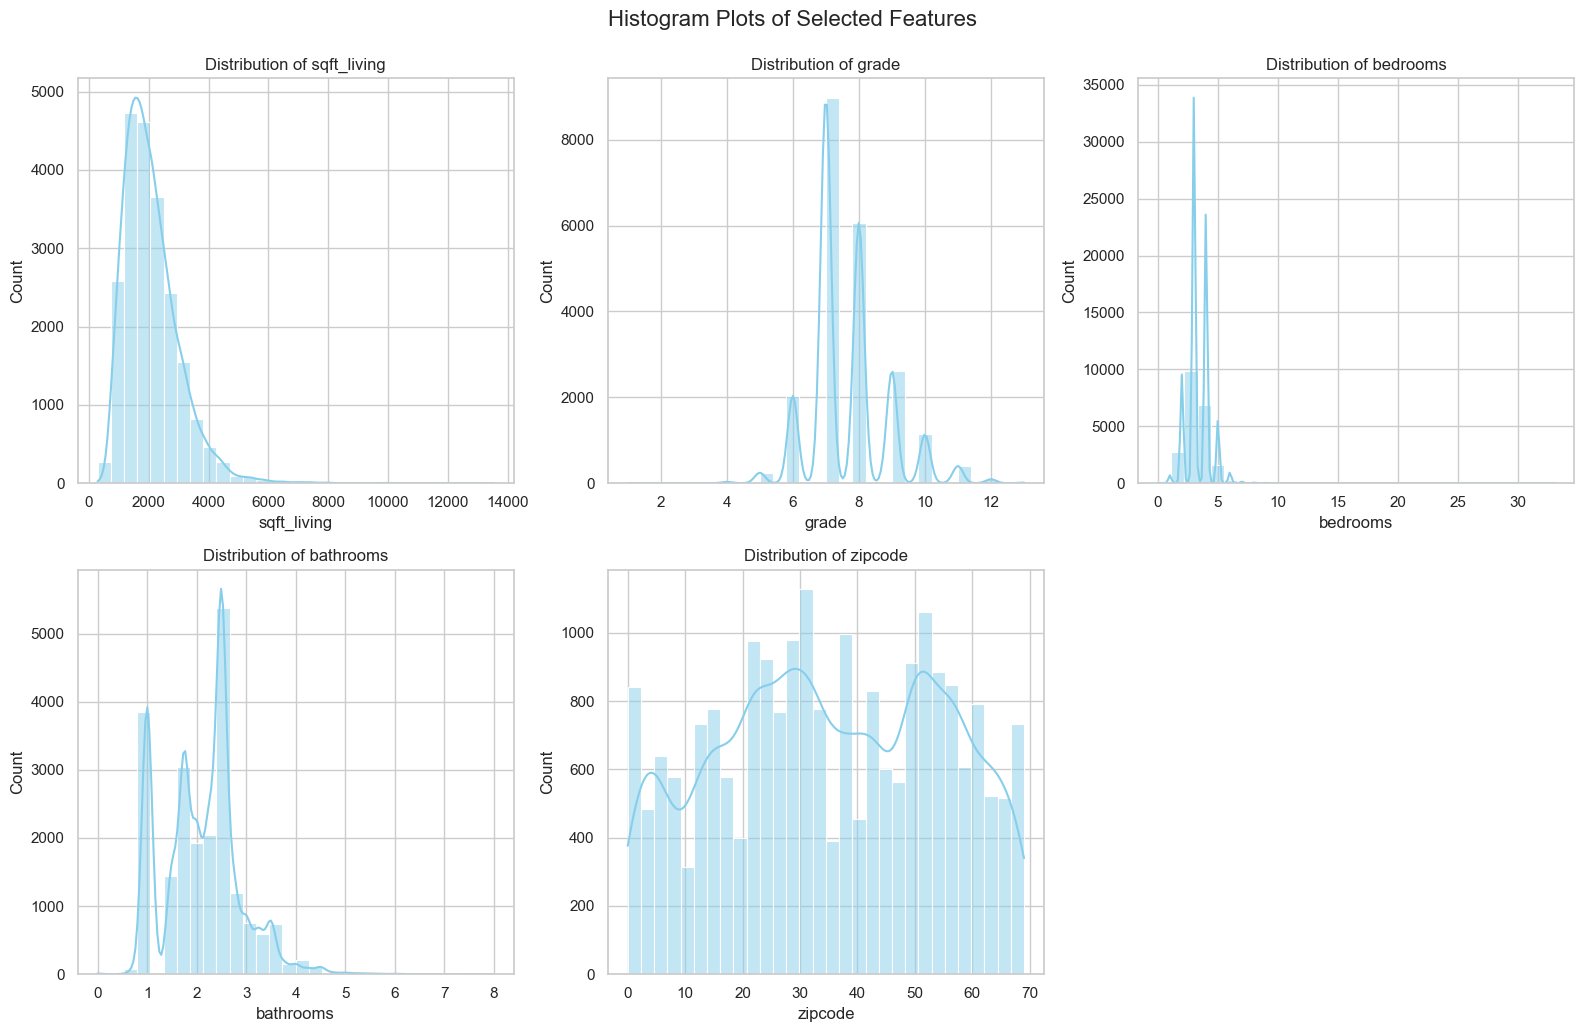

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of selected features
selected_features = ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'zipcode']

# Set up the plot grid
plt.figure(figsize=(16, 10))
sns.set(style="whitegrid")

# Plot each feature
for i, feature in enumerate(selected_features):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data=df, x=feature, bins=30, kde=True, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()
plt.suptitle('Histogram Plots of Selected Features', fontsize=16, y=1.03)
plt.show()


In [ ]:
def evaluate_models_1(train_X_1, test_X_1, train_y_1, test_y_1):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'KNN': KNeighborsRegressor(),
        'XGBoost': XGBRegressor(random_state=42, verbosity=0)
    }

    results = []

    for name, model in models.items():
        model.fit(train_X_1, train_y_1)

        # Predictions
        train_preds = model.predict(train_X_1)
        test_preds = model.predict(test_X_1)

        # Train metrics
        r2_train = r2_score(train_y_1, train_preds)
        mae_train = mean_absolute_error(train_y_1, train_preds)
        rmse_train = np.sqrt(mean_squared_error(train_y_1, train_preds))

        # Test metrics
        r2_test = r2_score(test_y_1, test_preds)
        mae_test = mean_absolute_error(test_y_1, test_preds)
        rmse_test = np.sqrt(mean_squared_error(test_y_1, test_preds))

        results.append({
            'Model': name,
            'R2 Train': round(r2_train, 4),
            'MAE Train': round(mae_train, 4),
            'RMSE Train': round(rmse_train, 4),
            'R2 Test': round(r2_test, 4),
            'MAE Test': round(mae_test, 4),
            'RMSE Test': round(rmse_test, 4)
        })

    results_df = pd.DataFrame(results)
    return results_df

In [ ]:
evaluate_models_1(X_train_1, X_test_1, y_train_1, y_test_1)

,Model,R2 Train,MAE Train,RMSE Train,R2 Test,MAE Test,RMSE Test
0,Linear Regression,0.5749,154896.3317,235664.3017,0.5791,159941.2556,252244.7277
1,Decision Tree,0.9957,5084.1196,23632.6606,0.3356,195507.8540,316936.5892
2,Random Forest,0.9471,55763.0088,83110.8199,0.5746,154351.7900,253608.9882
3,KNN,0.6742,136596.6537,206326.5598,0.5046,174460.2836,273654.4163
4,XGBoost,0.8472,106675.6421,141297.0665,0.5297,152955.5405,266629.4028


In [ ]:
def evaluate_scalers_models_2(X, y): 
    continuous_features = ['sqft_living', 'grade', 'sqft_above', 'sqft_living15']

    scalers = {
        'StandardScaler': StandardScaler(),
        'MinMaxScaler': MinMaxScaler(),
        'RobustScaler': RobustScaler(),
        'MaxAbsScaler': MaxAbsScaler(),
        'QuantileTransformer': QuantileTransformer(output_distribution='normal', random_state=42)
    }

    models = {
        'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
        'Decision Tree': DecisionTreeRegressor(random_state=42)
    }

    results = []

    for scaler_name, scaler in scalers.items():
        X_scaled = X.copy()
        X_scaled[continuous_features] = scaler.fit_transform(X_scaled[continuous_features])

        train_X, test_X, train_y, test_y = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

        for model_name, model in models.items():
            model.fit(train_X, train_y)

            # Predictions
            train_preds = model.predict(train_X)
            test_preds = model.predict(test_X)

            # Train metrics
            r2_train = r2_score(train_y, train_preds)
            mae_train = mean_absolute_error(train_y, train_preds)
            rmse_train = np.sqrt(mean_squared_error(train_y, train_preds))

            # Test metrics
            r2_test = r2_score(test_y, test_preds)
            mae_test = mean_absolute_error(test_y, test_preds)
            rmse_test = np.sqrt(mean_squared_error(test_y, test_preds))

            results.append({
                'Scaler': scaler_name,
                'Model': model_name,
                'R2 Train': round(r2_train, 4),
                'MAE Train': round(mae_train, 4),
                'RMSE Train': round(rmse_train, 4),
                'R2 Test': round(r2_test, 4),
                'MAE Test': round(mae_test, 4),
                'RMSE Test': round(rmse_test, 4)
            })

    results_df = pd.DataFrame(results)
    print(results_df.to_string(index=False))


In [ ]:
evaluate_scalers_models_2(X, y)
evaluate_scalers_models_2

             Scaler         Model  R2 Train  MAE Train  RMSE Train  R2 Test    MAE Test   RMSE Test
     StandardScaler Random Forest    0.9835 25343.4890  46442.0098   0.8508  72888.0149 150192.2056
     StandardScaler Decision Tree    1.0000     0.0000      0.0000   0.7048 104433.0097 211236.0585
       MinMaxScaler Random Forest    0.9835 25337.9200  46427.1957   0.8508  72878.0208 150186.1309
       MinMaxScaler Decision Tree    1.0000     0.0000      0.0000   0.7048 104476.2797 211246.5743
       RobustScaler Random Forest    0.9835 25339.5864  46425.3561   0.8507  72903.3000 150213.4178
       RobustScaler Decision Tree    1.0000     0.0000      0.0000   0.7046 104552.4268 211305.9641
       MaxAbsScaler Random Forest    0.9835 25337.1672  46420.5490   0.8506  72923.7987 150267.1895
       MaxAbsScaler Decision Tree    1.0000     0.0000      0.0000   0.7048 104520.1945 211262.2029
QuantileTransformer Random Forest    0.9835 25337.7722  46425.7908   0.8504  72956.8830 150397.0447


<function __main__.evaluate_scalers_models_2(X, y)>

In [ ]:
my_selected_features = ['sqft_living', 'grade', 'bedrooms', 'bathrooms', 'zipcode']
my_X = df[my_selected_features]
my_y = df['price']

In [ ]:
X_train_my, X_test_my, y_train_my, y_test_my = train_test_split(my_X, my_y, test_size=0.2, random_state=42)

In [ ]:
def my_evaluate_model(X_train_my, X_test_my, y_train_my, y_test_my):
    models = {
        'Linear Regression': LinearRegression(),
        'Decision Tree': DecisionTreeRegressor(random_state=42),
        'Random Forest': RandomForestRegressor(random_state=42),
        'KNN': KNeighborsRegressor(),
        'XGBoost': XGBRegressor(random_state=42, verbosity=0)
    }

    results = []

    for name, model in models.items():
        model.fit(X_train_my, y_train_my)

        # Predictions
        train_preds = model.predict(X_train_my)
        test_preds = model.predict(X_test_my)

        # Train metrics
        r2_train = r2_score(y_train_my, train_preds)
        mae_train = mean_absolute_error(y_train_my, train_preds)
        rmse_train = np.sqrt(mean_squared_error(y_train_my, train_preds))

        # Test metrics
        r2_test = r2_score(y_test_my, test_preds)
        mae_test = mean_absolute_error(y_test_my, test_preds)
        rmse_test = np.sqrt(mean_squared_error(y_test_my, test_preds))

        results.append({
            'Model': name,
            'R2 Train': round(r2_train, 4),
            'MAE Train': round(mae_train, 4),
            'RMSE Train': round(rmse_train, 4),
            'R2 Test': round(r2_test, 4),
            'MAE Test': round(mae_test, 4),
            'RMSE Test': round(rmse_test, 4)
        })

    results_df = pd.DataFrame(results)
    return results_df


In [ ]:
my_evaluate_model(X_train_my, X_test_my, y_train_my, y_test_my)

,Model,R2 Train,MAE Train,RMSE Train,R2 Test,MAE Test,RMSE Test
0,Linear Regression,0.5496,158441.2080,242575.7261,0.5555,162935.0195,259216.2597
1,Decision Tree,0.9971,4891.4711,19550.1683,0.5478,124953.0861,261465.1297
2,Random Forest,0.9680,36207.1410,64662.4729,0.7336,97994.9418,200678.0208
3,KNN,0.6991,121930.4734,198289.3610,0.5162,159432.1065,270455.4610
4,XGBoost,0.9204,65043.9078,102010.3203,0.7533,91573.3428,193118.3551


In [ ]:
model = DecisionTreeRegressor( max_depth=5, min_samples_split=10, min_samples_leaf=5, random_state=42)
model

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [ ]:
model.fit(X_train_my, y_train_my)

DecisionTreeRegressor(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                      random_state=42)

In [ ]:
# Predict
train_preds = model.predict(X_train_my)
test_preds = model.predict(X_test_my)

In [ ]:
r2_test=r2_score(y_train_my,train_preds)
mae_test = mean_absolute_error(y_test_my, test_preds)
rmse_test = np.sqrt(mean_squared_error(y_test_my, test_preds))
print(f"The R square score for the test is {r2_test}")
print(f"The Mean Absolute Error for the test is {mae_test}")
print(f"The Mean Squared Error for the test is {rmse_test}")

The R square score for the test is 0.6361725877436447
The Mean Absolute Error for the test is 152016.28000022387
The Mean Squared Error for the test is 250390.6482341164
